In [99]:
import pandas as pd
import statsmodels.api as sm
x=pd.read_csv("C:/Users/charumathi/Desktop/Social_Network_Ads (2).csv")
df=pd.DataFrame(x)
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Gender           400 non-null    object 
 2   Age              400 non-null    float64
 3   EstimatedSalary  400 non-null    float64
 4   Purchased        400 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 15.8+ KB


In [101]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [102]:
df.shape

(400, 5)

In [103]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

(array([196.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 204.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

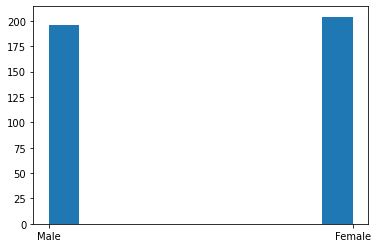

In [104]:
import matplotlib.pyplot as plt
plt.hist(df["Gender"])

<BarContainer object of 400 artists>

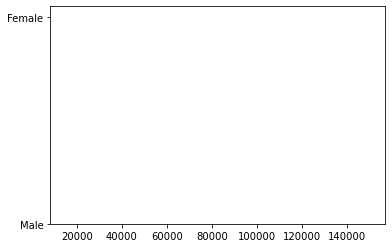

In [105]:
import matplotlib.pyplot as plt
plt.bar(x=df["EstimatedSalary"],height=df["Gender"])

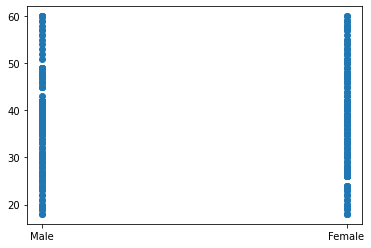

In [106]:
plt.scatter(df["Gender"],df["Age"])

<AxesSubplot:xlabel='Purchased', ylabel='Gender'>

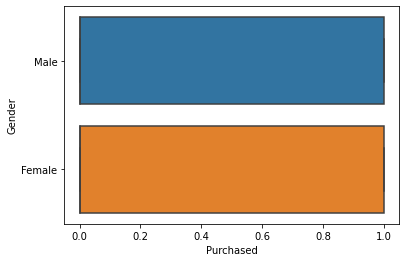

In [107]:
import seaborn as sns
sns.boxplot(x=df["Purchased"],y=df["Gender"])

In [108]:
df.corr().style.background_gradient(cmap="coolwarm")

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


In [109]:
for i in df:
    if df[i].dtype==object:
        from sklearn.preprocessing import LabelEncoder
        le=LabelEncoder()
        df[i]=le.fit_transform(df[i])

In [110]:
x=df.drop(["Purchased","Gender"],axis=1)
y=df.iloc[:,4]

In [111]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((320, 3), (80, 3), (320,), (80,))

In [112]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [113]:
#RANDOM FOREST CLASSIFIER
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [114]:
y_pred=model.predict(x_test)
print(y_pred)

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1]


In [115]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.95

In [116]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred,y_test)

array([[55,  1],
       [ 3, 21]], dtype=int64)

In [117]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        56
           1       0.95      0.88      0.91        24

    accuracy                           0.95        80
   macro avg       0.95      0.93      0.94        80
weighted avg       0.95      0.95      0.95        80



In [118]:
#TO COMPUTE RECEIVER OPERATING CHARACTERISTICS
from sklearn.metrics import roc_curve

In [119]:
#TO CALCULATE AREA UNDER CURVE
from sklearn.metrics import roc_auc_score

In [120]:
#VISUALIZING ROC_AUC CURVE
y_proba=model.predict_proba(x_test)
y_predicted=y_proba[:,1]
print(y_predicted)

[0.04 0.03 0.   0.04 0.01 0.05 0.03 0.87 0.   0.81 0.02 0.   0.13 0.34
 0.01 0.57 0.19 0.02 0.96 0.01 0.03 0.92 0.   0.96 0.02 0.84 0.05 0.01
 0.04 0.19 0.16 0.15 0.79 0.02 0.   0.02 0.   0.03 0.03 0.91 0.1  0.
 0.06 0.04 0.75 0.   0.13 0.85 0.   0.66 0.95 0.02 0.18 0.74 0.64 0.82
 0.04 0.15 0.87 0.02 0.06 0.65 0.03 0.92 0.02 0.86 0.06 0.06 0.03 0.44
 0.97 0.06 0.01 0.8  0.07 0.   0.15 0.06 0.98 0.73]


In [121]:
fpr,tpr,thresholds=roc_curve(y_test,y_predicted)

In [122]:
#PASSING FPR,TPR VALUES TO AUC TO CALCULATE AREA UNDER THE CURVE
from sklearn.metrics import auc
roc_auc=auc(fpr,tpr)
print("Area under the curve for first model",roc_auc)

Area under the curve for first model 0.9835423197492164


Text(0, 0.5, 'True Positive Rate(Sensitivity)')

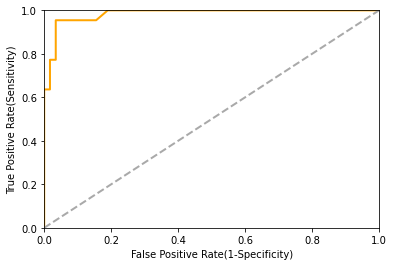

In [124]:
#PLOTTING THE ROC CURVE
plt.figure()
plt.plot(fpr,tpr,color='orange',lw=2,label='ROC curve(area under curve=%0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='darkgrey',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate(1-Specificity)")
plt.ylabel("True Positive Rate(Sensitivity)")